In [1]:
from pandas import DataFrame, Series, read_csv
from numpy import array
import pandas as pd
import numpy as np
import math
from sklearn.ensemble import  GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gbmdata = read_csv('gbm-data.csv')
X = gbmdata.values
Y = X[:, 0]
X = X[:,1:]
(X_train, 
X_test, 
Y_train, 
Y_test) = train_test_split(X,
                          Y,
                          test_size=0.8,
                          random_state=241)

In [3]:
learning_rates = [1, 0.5, 0.3, 0.2, 0.1] #[.2]#

(0.58229425942784763, 0, 1)
(0.55820255231642613, 6, 0.5)
(0.54231411100245541, 10, 0.3)
(0.53145079631906378, 36, 0.2)
(0.52692018722758438, 51, 0.1)


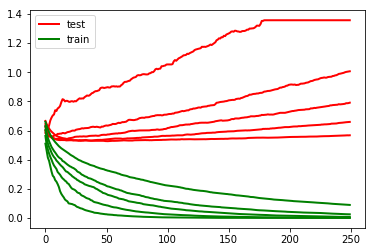

In [12]:
plt.figure()
for lr in learning_rates:
    Y_pred = []
    test_loss = []
    train_loss = []
    minll = 1e+12, 0
    clf = GradientBoostingClassifier(n_estimators=250,
                                     verbose=False,
                                     random_state=241,
                                     learning_rate=lr)
    clf.fit(X_train, Y_train)
    for i, y_pred in enumerate(clf.staged_predict_proba(X_test)):
        ll = log_loss(Y_test, y_pred)
        test_loss.append(ll)
        if ll < minll[0]:
            minll = (ll, i, lr)
    for i, y_pred in enumerate(clf.staged_predict_proba(X_train)):
        train_loss.append(log_loss(Y_train, y_pred))
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    print(minll)

In [8]:
print(ll)

0.567281215434


In [9]:
i

249

In [18]:
rf = RandomForestClassifier(n_estimators=51, random_state=241, n_jobs=-1)
%time rf.fit(X_train, Y_train)

Wall time: 351 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=-1,
            oob_score=False, random_state=241, verbose=0, warm_start=False)

In [19]:
rf.score(X_test, Y_test)

0.73642119293568808

In [20]:
y_pred = rf.predict_proba(X_test)

In [21]:
y_pred.shape

(3001, 2)

In [22]:
Y_test.shape

(3001,)

In [27]:
log_loss(Y_test, y_pred[:, 1])

0.53887346600270325

In [25]:
y_pred[:,0]

array([ 0.25490196,  0.7254902 ,  0.62745098, ...,  0.62745098,
        0.66666667,  0.25490196])